# Graph Theory & Networks

Follow the notebook to see implementation of reading in nodes of information and building a graph that shows the network relation of the inputs. 

In [9]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Pre-Processing Data

The input dataset tracks flights from various airports and cities across the globe with additional information including the departure and arrival cities, airport codes, and time zones. Luckily, this dataset comes with labels that are already organized and prepped for what we want. 

Note that the dimensions of the dataset are 2905 rows x 12 columns. Since we want to see as many locations as possible, we are going to use all the rows, but will only use a few key columns for processing such as city name, latitude, and longitude.

Since we can load this into the network directly, we do not need to edit the dataframe beforehand.

In [ ]:
#load data
filename_edges = 'airport_Edges_GC.csv'
filename_nodes = 'airport_Nodes_GC.csv' 

df_nodes = pd.read_csv(filename_nodes, sep=',', engine='python')
df_edges = pd.read_csv(filename_edges, sep=',', engine='python')
df_nodes

## Building a Graph Network

In [16]:
#read in node and edge data and create initial directed network
D = nx.DiGraph() #directed graph

#from the dataframe, create a network edges for each node
D = nx.from_pandas_edgelist(df_edges, source='Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph())

#add the node attributes
nx.set_node_attributes(D, df_nodes.set_index('Id').to_dict('index'))
print(D)    #sanity check to see how many nodes we have, should be 2905

DiGraph with 2905 nodes and 30442 edges


Now that we have set values from the CSV into a graph, we want to set the positions for plotting:

In [11]:
#plot the airport network with the given info

#longitude and latitude coordinates for nodes using pos
node_long = nx.get_node_attributes(D, "Longitude")
node_lat = nx.get_node_attributes(D, "Latitude")

Upos = {} #set the positions for each node, like a xy coordinate system
for node in list(D):
  Upos[node] = (node_long[node], node_lat[node])

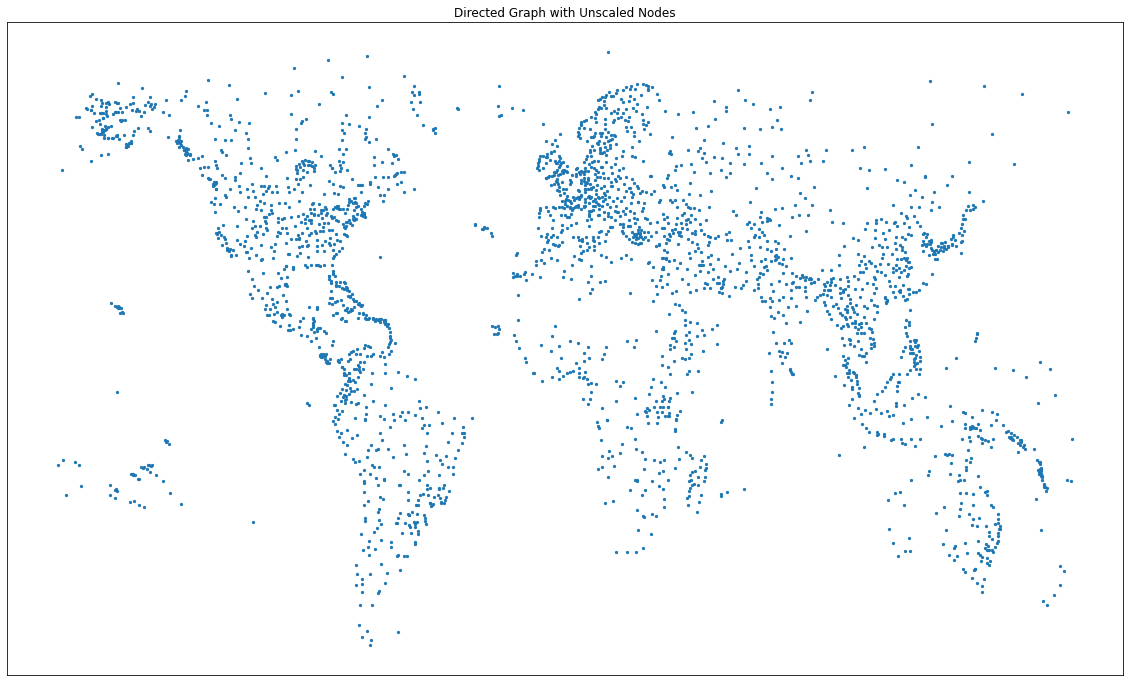

In [14]:
#Plot just the nodes

plt.figure(figsize=(20,12))
plt.title('Directed Graph with Unscaled Nodes')
nx.draw_networkx_nodes(D, pos=Upos, node_size = 5)
plt.show()

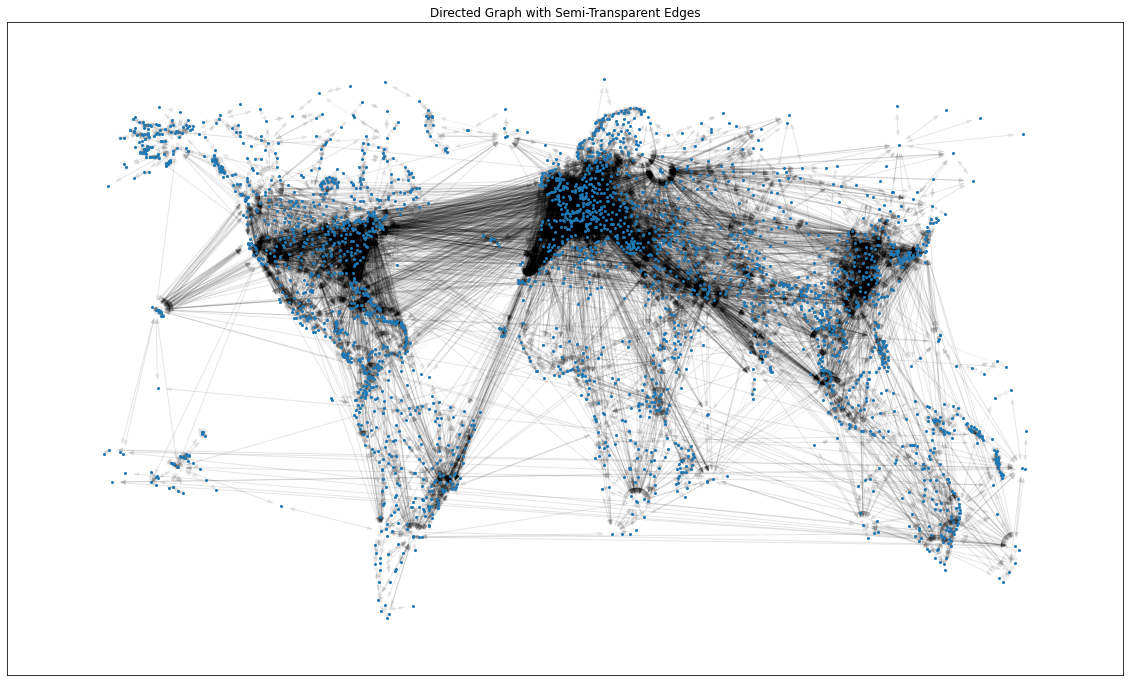

In [18]:
#plot nodes with the edges

plt.figure(figsize=(20,12))
plt.title('Directed Graph with Semi-Transparent Edges')
nx.draw_networkx_nodes(D, pos=Upos, node_size=4)
nx.draw_networkx_edges(D,pos=Upos,  alpha = 0.05)
plt.show()

The outputs from both graphs show the capabilities of graph networks since you can directly visualize the movement of values. 

We can clearly see that this network creates a map of the globe through airport locations.